In [1]:
import tensorflow as tf

i:\Fall-25\CVPR_FINAL_ASSIGNMENT\tfenv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
(train_imgs,train_labels),(test_imgs,test_labels)= tf.keras.datasets.mnist.load_data()

In [3]:
print(train_imgs.shape)

(60000, 28, 28)


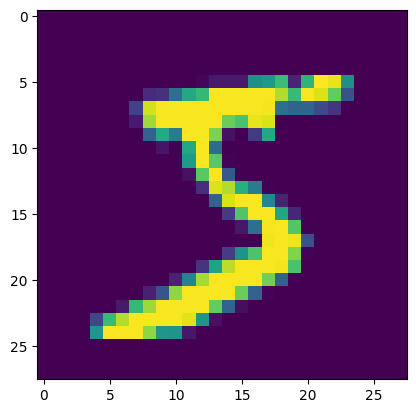

In [4]:
import matplotlib.pyplot as plt
plt.imshow(train_imgs[0])

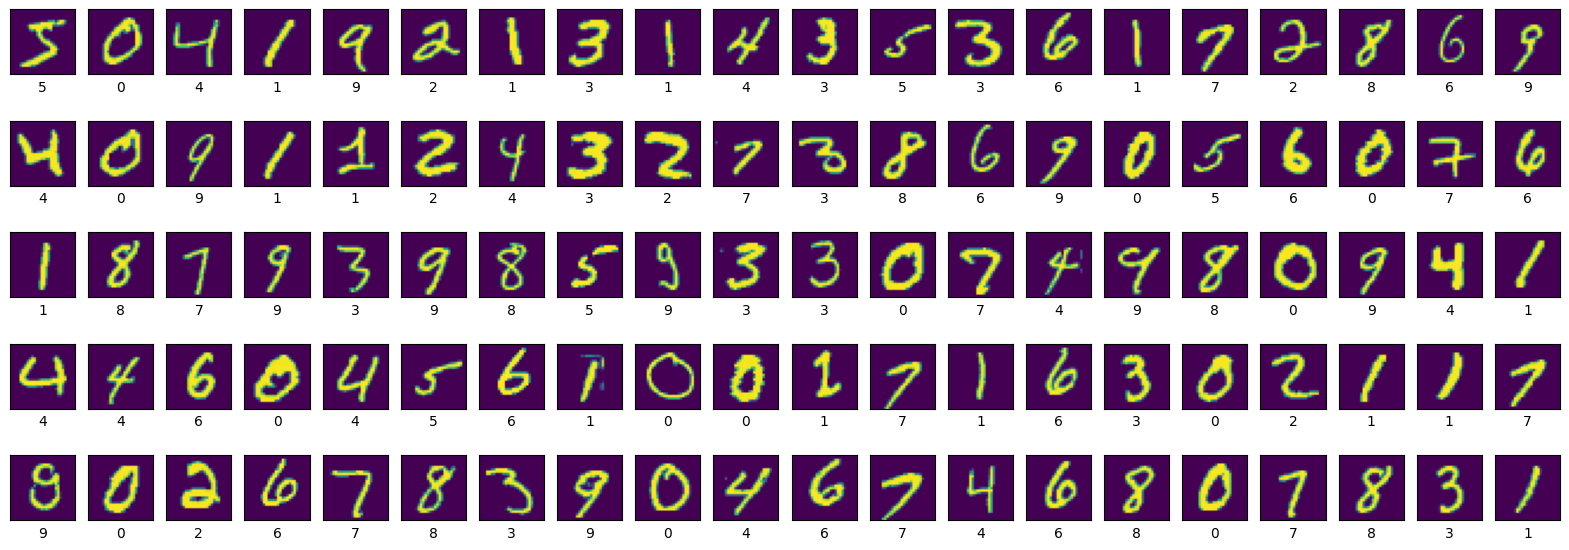

In [5]:
i=0
plt.figure(figsize=(20,7))
for r in range(5):
    for c in range(20):
        plt.subplot(5,20,i+1)
        plt.imshow(train_imgs[i])
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(train_labels[i])
        i = i + 1
plt.show()

In [6]:
train_imgs_norm =  train_imgs.reshape(60000,784).astype("float32")/255
test_imgs_norm =  test_imgs.reshape(10000,784).astype("float32")/255


In [7]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    metrics= ['accuracy']
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9160 - loss: 0.2798 - val_accuracy: 0.9542 - val_loss: 0.1467
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9640 - loss: 0.1156 - val_accuracy: 0.9650 - val_loss: 0.1170
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9759 - loss: 0.0782 - val_accuracy: 0.9733 - val_loss: 0.0916
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9812 - loss: 0.0615 - val_accuracy: 0.9720 - val_loss: 0.0986
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9843 - loss: 0.0500 - val_accuracy: 0.9712 - val_loss: 0.0993
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9863 - loss: 0.0413 - val_accuracy: 0.9732 - val_loss: 0.0923
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9887 - loss: 0.0344 - val_accuracy: 0.9732 - val_loss: 0.1016
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9907 - loss: 0.0278 - 

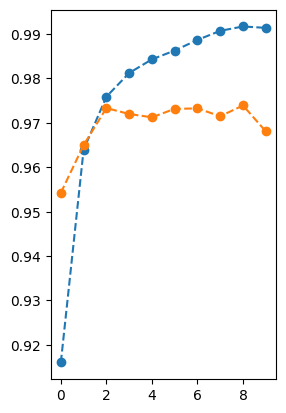

In [9]:
h = model.fit(
    x = train_imgs_norm,
    y = train_labels,
    epochs = 10,
    validation_split = 0.2
)

h.history
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'],"--o")
plt.plot(h.history['val_accuracy'],"--o")

In [10]:
t_loss , t_acc = model.evaluate(test_imgs_norm,test_labels)
print(t_loss,t_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9709 - loss: 0.1208
0.1208476573228836 0.9708999991416931


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


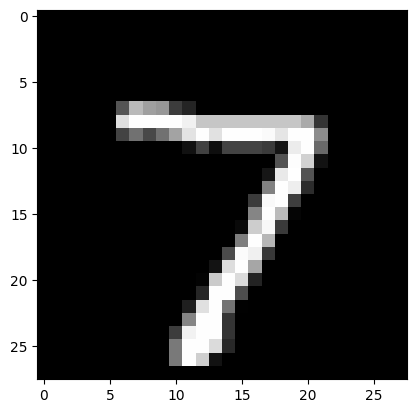

<BarContainer object of 10 artists>

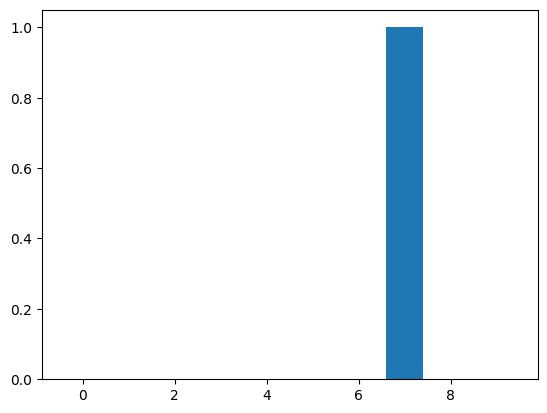

In [11]:
predictions = model.predict(test_imgs_norm)
plt.imshow(test_imgs[0], cmap='gray')  # test_imgs[0] is 28x28
plt.show()
plt.bar(range(10),predictions[0])

In [12]:
import cv2
import numpy as np

In [13]:
# Assuming `model` is your trained MNIST model

cap = cv2.VideoCapture(0)  # start webcam

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # convert to grayscale
    cv2.imshow("Webcam - Press 'c' to capture, 'q' to quit", gray)

    key = cv2.waitKey(1) & 0xFF
    if key == ord('c'):
        # Preprocess for MNIST model
        img_resized = cv2.resize(gray, (28, 28))
        img_norm = img_resized.reshape(1, 784).astype("float32") / 255.0

        # Predict
        prediction = model.predict(img_norm)
        predicted_digit = np.argmax(prediction)
        print(f"Predicted Digit: {predicted_digit}")

    elif key == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Digit: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Digit: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Digit: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Digit: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Digit: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Digit: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Digit: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Digit: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Digit: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Digit: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Digit: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Digit: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Digit: 5
